<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from enm.enm import Enm

In [54]:
ba = nx.connected_watts_strogatz_graph(20,5,.5)

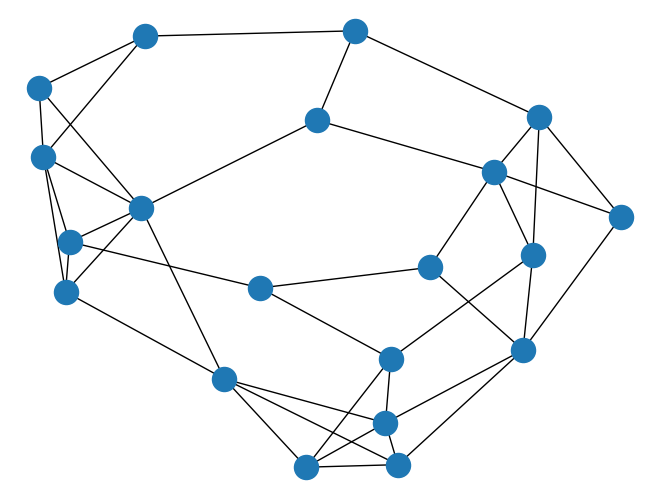

In [55]:
nx.draw(ba)

In [56]:
e_ba = Enm('ba')
e_ba.G = ba
e_ba.giant_component()
e_ba.gnm_analysis()
e_ba.get_prs(no_diag=False)

@> 19 modes were calculated in 0.01s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.
@> Calculating covariance matrix
@> Covariance matrix calculated in 0.0s.
@> Calculating perturbation response
@> Perturbation response matrix calculated in 0.0s.
@> Perturbation response scanning completed in 0.0s.


In [59]:
pos = nx.spring_layout(ba)

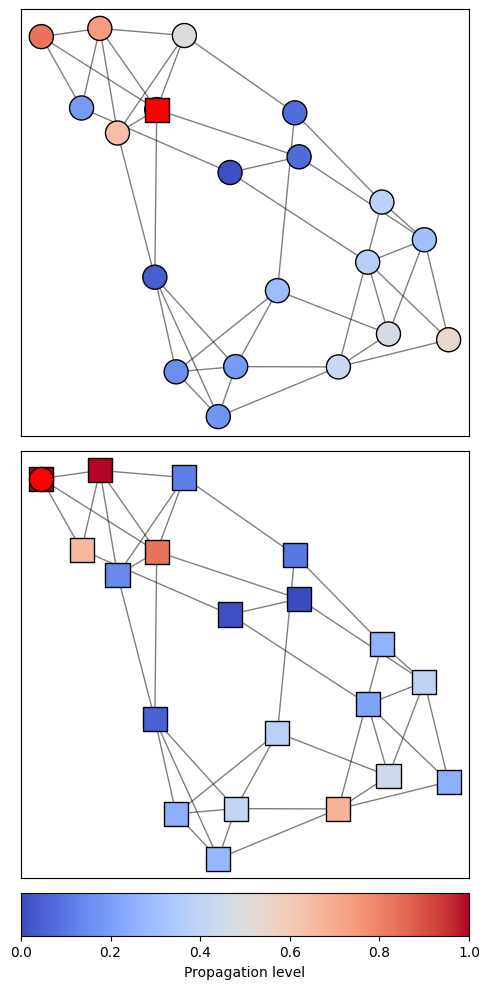

In [81]:
plt.style.use('default')
proj_prs_1 = e_ba.prs_mat[[np.argmax(e_ba.prs_mat.mean(axis=1))],:]#.mean(axis=0)
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(5,10),gridspec_kw={'height_ratios': [10,10, 1]})
plt.style.use('default')
proj_prs_2 = e_ba.prs_mat[:,np.argmax(e_ba.prs_mat.mean(axis=0))]#.mean(axis=0)

nx.draw_networkx_nodes(ba,pos=pos, node_color=proj_prs_1, cmap=plt.cm.coolwarm,ax=ax[0],edgecolors='black',vmin=0,vmax=0.3)
nx.draw_networkx_nodes(nx.induced_subgraph(ba,np.argmax(e_ba.prs_mat.mean(axis=1))),pos=pos, node_color='red',cmap=plt.cm.coolwarm,ax=ax[0],edgecolors='black',vmin=0,vmax=2.5,node_shape='s')
nx.draw_networkx_edges(ba,pos=pos,ax=ax[0],alpha=0.5)

nx.draw_networkx_nodes(ba,pos=pos, node_color=proj_prs_2,cmap=plt.cm.coolwarm,ax=ax[1],edgecolors='black',vmin=0,vmax=.3, node_shape='s')
nx.draw_networkx_nodes(nx.induced_subgraph(ba,np.argmax(e_ba.prs_mat.mean(axis=0))),pos=pos, node_color='red',cmap=plt.cm.Greens,ax=ax[1],edgecolors='black',vmin=0,vmax=2.5)
nx.draw_networkx_edges(ba,pos=pos,ax=ax[1],alpha=0.5)

# Turn these into an object that can be used to map time values to colors and
# can be passed to plt.colorbar().
cpick = plt.cm.ScalarMappable(norm=None,cmap=plt.cm.coolwarm)
cpick.set_array([])



#F = plt.figure()
#A = fig.add_subplot(111)
#for y, t in zip(ydat,tim):
#    A.plot(xdat,y,color=cpick.to_rgba(t))

plt.colorbar(cpick,label="Propagation level",cax=ax[2],orientation='horizontal')

plt.tight_layout()

plt.savefig('../reports/figures/paper_figures_0423_pcc_only/random_propagation_vertical.pdf')

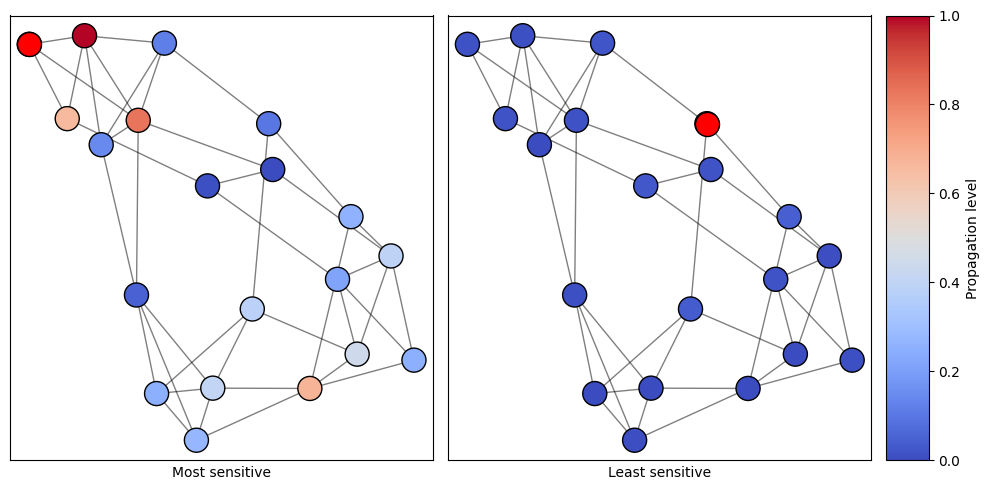

In [68]:
plt.style.use('default')

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5),gridspec_kw={'width_ratios': [10,10, 1]})
plt.style.use('default')
proj_prs_2 = e_ba.prs_mat[:,np.argmin(e_ba.prs_mat.mean(axis=0))]#.mean(axis=0)

nx.draw_networkx_nodes(ba,pos=pos, node_color=proj_prs_2, cmap=plt.cm.coolwarm,ax=ax[1],edgecolors='black',vmin=0,vmax=1.5)
nx.draw_networkx_nodes(nx.induced_subgraph(ba,np.argmin(e_ba.prs_mat.mean(axis=0))),pos=pos, node_color='red',cmap=plt.cm.Greens,ax=ax[1],edgecolors='black',vmin=0,vmax=.5)
nx.draw_networkx_edges(ba,pos=pos,ax=ax[1],alpha=0.5)
ax[0].set_xlabel('Most sensitive')
ax[1].set_xlabel('Least sensitive')
cpick = plt.cm.ScalarMappable(norm=None,cmap=plt.cm.coolwarm)
cpick.set_array([])
plt.colorbar(cpick,label="Propagation level",cax=ax[2])
plt.tight_layout()